# Magnet Losses Calculation with IALH Method

In [1]:
import femagtools
import pathlib
import logging

logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(message)s')

## Define a machine model

In [2]:
machine = dict(
    name="PM130L4",
    lfe=30e-3,
    poles=10,
    outer_diam=0.1,
    bore_diam=0.055,
    inner_diam=0.035,
    airgap=0.001,
    stator=dict(
        num_slots=12,
        statorfsl=dict(
            sw=0.005,
            tw=0.007,
            slot_h1=0.0017,
            slot_h2=0.002)
    ),
    magnet=dict(
        magnetfsl=dict(
           hm=3e-3,
           bm=11.205e-3
        )
    ),

    windings=dict(
        num_phases=3,
        num_wires=10,
        coil_span=1,
        num_layers=2)
)

## Define a PM/Reluctance Simulation

In [3]:
workdir = pathlib.Path().home() / 'femag'
workdir.mkdir(parents=True, exist_ok=True)

femag = femagtools.Femag(workdir, templatedirs=['templates'])
simulation = dict(
    angl_i_up=0,
    calculationMode="pm_sym_fast",
    wind_temp=60.0,
    magn_temp=20.0,
    current=30.0,
    speed=8000/60,
    num_move_steps=-73,
    period_frac=6,
    magnet_loss=True)   # set magnet_loss


2023-10-24 10:39:03,091 MC Dir /home/tar/projects/femagtools/notebooks


## Run simulation

In [4]:
r = femag(machine, simulation)

2023-10-24 10:39:03,095 [30, 12]
2023-10-24 10:39:03,096 create new model 'PM130L4'
2023-10-24 10:39:03,113 create simulation 'pm_sym_fast'
2023-10-24 10:39:03,119 invoking /home/tar/bin/xfemag64 -b femag.fsl
2023-10-24 10:39:03,138  > FSL...exe "femag.fsl"
2023-10-24 10:39:03,138  > New model "PM130L4", ""
2023-10-24 10:39:06,063  > 1  -1.40584947E-04
2023-10-24 10:39:09,106  > 1  -1.69586856E-04
2023-10-24 10:39:11,445  > Save model and close files
2023-10-24 10:39:11,472  > FSL...halt
2023-10-24 10:39:11,488 /home/tar/bin/xfemag64 exited with returncode 0 (num errs=0)
2023-10-24 10:39:11,490 Read BCH /home/tar/femag/PM130L4_020.BATCH
2023-10-24 10:39:11,496 Evaluating magnet losses...
2023-10-24 10:39:12,166 Total nodes 5995 elements 10794 superelements 67 subregions 14
2023-10-24 10:39:12,896 Total nodes 5995 elements 10794 superelements 67 subregions 14
2023-10-24 10:39:13,048 magnet width and height: 11.20mm 3.08mm
2023-10-24 10:39:13,349 magnet width and height: 11.20mm 3.08mm


Analyze magnet losses of all load cases: noload, angl=0

In [5]:
print("Magnet Losses: ")
for i in r.losses: 
    print(f'J2: {i["magnetJ"]}W B2: {i["magnetB"]}W IALH: {i["magnetH"]:.3f}W')

Magnet Losses: 
J2: 5.004W B2: 7.402W IALH: 4.552W
J2: 5.004W B2: 7.402W IALH: 4.552W
J2: 11.212W B2: 15.979W IALH: 9.588W


Show bar plot

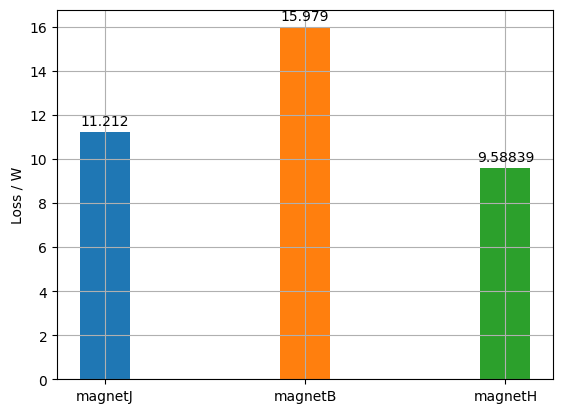

In [6]:
import matplotlib.pyplot as plt

keys = "magnetJ","magnetB","magnetH"
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
for i, k in enumerate(keys):
    rects = ax.bar(i, r.losses[-1][k], width)
    ax.bar_label(rects, padding=3)

ax.set_ylabel('Loss / W')
ax.set_xticks(range(len(keys)), keys)
ax.grid()

2023-10-24 10:39:14,839 Total nodes 5995 elements 10794 superelements 67 subregions 14


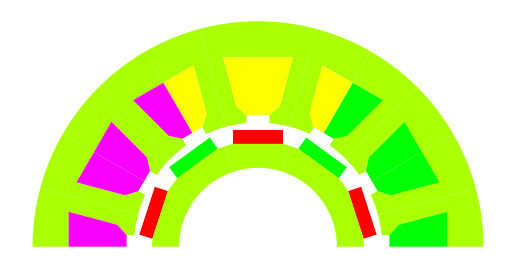

In [7]:
import femagtools.plot.nc
femagtools.plot.nc.spel(femag.read_nc())